# Working with data

In [112]:
import torch
from torch import nn
# from torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [113]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

training data와 test data를 따로 저장

In [114]:
batch_size = 10

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])에서
C는 Chanel이나, 차원을 하나로 할 것이기에 설명하지 않음.

In [115]:
num = 0
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    num += 1
print(num)

Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape of y: torch.Size([10]) torch.int64
Shape of X [N, C, H, W]: torch.Size([10, 1, 28, 28])
Shape o

## epoch, batch

if. for x, y in dataloader:
        y = model(x)

이면, ...

(18차시 노트 참조)

# Creating Models

In [116]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),  # nn.Linear(a, b)는 input a와 output b를 ...
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [117]:
class fcn(nn.Module):
    def __init__(self):
        super().__init__()
        self.softmax = nn.Softmax(dim=-1)   # -1은 마지막 index
        self.flatten = nn.Flatten()
        self.fcn = nn.Sequential(nn.Linear(28*28, 64),
                                nn.ReLU(),
                                nn.Linear(64, 64),
                                nn.ReLU(),
                                nn.Linear(64, 10))

    def forward(self, x):
        x = self.flatten(x)
        x = self.fcn(x)
        x = self.softmax(x)
        return x

In [118]:
model = fcn()

In [134]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)    # lr: learning rate

In [ ]:
# for X, y in train_dataloader:
#     print(X.shape, y.shape)
#     plt.imshow(X[0, 0], cmap='gray')
#     plt.show()
#     print(y[0])
#     model.train()
#     pred = model(X)
#     print(pred.shape)
#     plt.plot(pred[0].detach().numpy(), 'b.')
#     plt.show()
#     # break

In [215]:
for epoch in range (100):

    correct = 0
    losses = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model.train()
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        loss = loss_fn(pred, y)
        losses += loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if(batch%10 == 0):
            print("loss: ", losses/10/64, "correct: ", correct/10/64)
            losses = 0
            correct = 0

        # break

ValueError: not enough values to unpack (expected 3, got 2)

softmax function (이게 뭐임?)

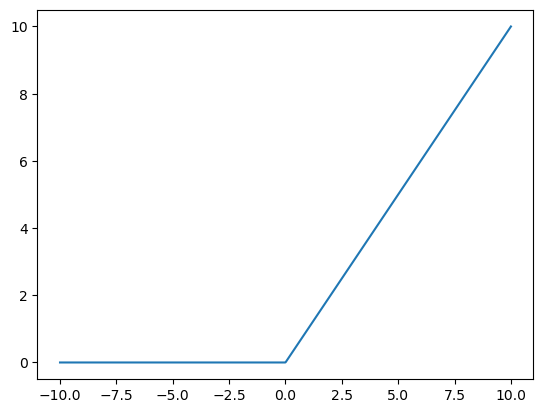

In [120]:
relu = nn.ReLU()
x = torch.linspace(-10, 10, 1000)
plt.plot(x, relu(x))    # ReLU function 개형

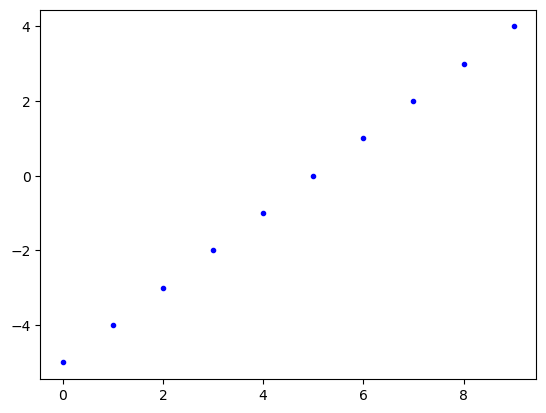

C:\Users\admin\AppData\Local\Temp\ipykernel_10932\4134770114.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plt.plot(softmax(x), 'b.')


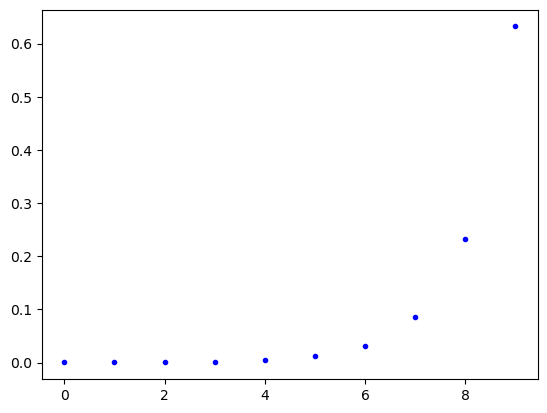

In [121]:
softmax = nn.Softmax()
x = torch.arange(-5, 5) * 1.
plt.plot(x, 'b.')
plt.show()
plt.plot(softmax(x), 'b.')
plt.show()
print()